In [2]:
import numpy as np
from scipy import ndimage
from skimage import io
from skimage import transform


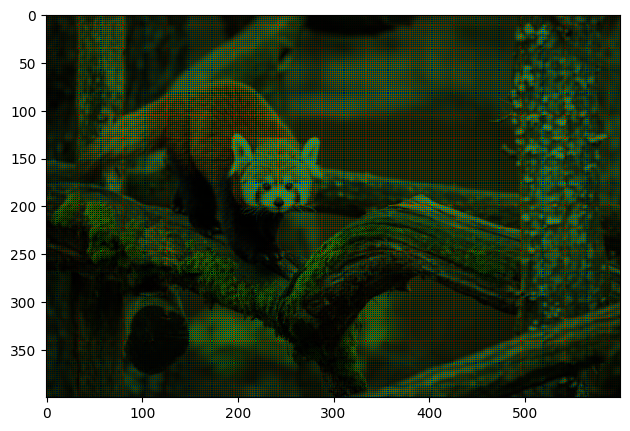

In [5]:
obraz = np.load("C:/Users/matiu/Downloads/CFA_NPY/CFA_NPY/Bayer/pandas.npy")
io.imshow(obraz)

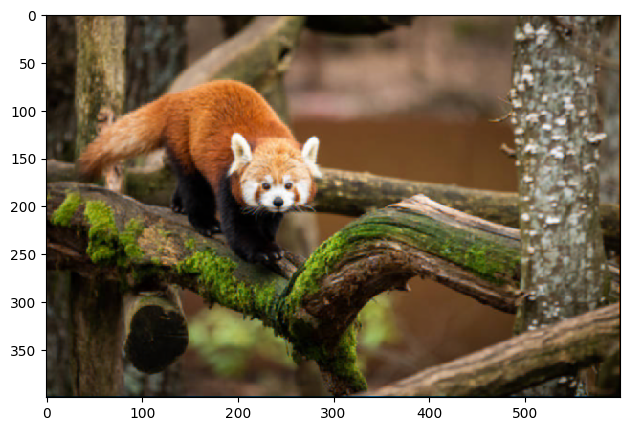

In [6]:
def kolory(maska, ksztalt):
    return np.dstack(
        [
            np.tile(maska[kanal, :, :], (ksztalt[0] // maska.shape[1], ksztalt[1] // maska.shape[2]))
            for kanal in range(maska.shape[0])
        ]
    )

maska_bayera = np.array([[[0, 1], [0, 0]], [[1, 0], [0, 1]], [[0, 0], [1, 0]]], dtype=np.uint8)

# Dopasuj ksztalt filtru 
filtr_bayera = kolory(maska_bayera, ksztalt=obraz.shape)
obraz_sensora = obraz * filtr_bayera
_ = io.imshow(obraz_sensora)

maska_demozaikowania = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])
zrekonstruowany = np.dstack([
    ndimage.convolve(obraz_sensora[:, :, kanal], maska_demozaikowania[:, :, kanal], mode="constant", cval=0.0)
    for kanal in range(3)
])

_ = io.imshow(zrekonstruowany)